<h1><center><b> Using A Support Vector Machine (SVM) to Classify Human Cells</b></center></h1>

- We will be using a machine learning method (SVM) for classification of human cells as benign (value=2) or malignant (value=4).
- The dataset consists of several hundred human cell sample records.

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import requests
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
req = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv')

url_content=req.content
file=open('cell_samples.csv', 'wb')
file.write(url_content)

df= pd.read_csv('cell_samples.csv')

df.head()



,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

**Visualize the distribution of classes based on Clump thickness and Uniformity of cell size**

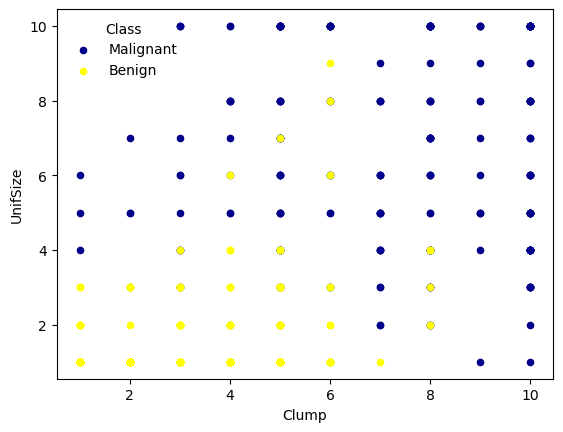

In [16]:
ax = df[df['Class'] == 4].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='Malignant');
df[df['Class'] == 2].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='Benign', ax=ax);
plt.legend(loc='upper left', title='Class', frameon=False)
plt.show()

We can see that the data is not linearly separable and will have to tranform the data to a higher dimension (**kernaling**)

## **Data Preprocessing**

In [17]:
#What are the column data types?
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

The 'BareNuc' column has an object data type. Drop the rows that are not numerical.

In [18]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [19]:
#Convert to numpy array
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [20]:
#Class can only have two values
df['Class'] = df['Class'].astype('int')
y = np.asarray(df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

## **Building a Model**

In [21]:
#Split data into testing/training sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [22]:
#Fit the model
from sklearn import svm
clf = svm.SVC(kernel='rbf') #rbf is default kernal function
clf.fit(X_train, y_train) 

SVC()

In [23]:
#Use the model to predict new values
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

## **Model Evaluation**

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


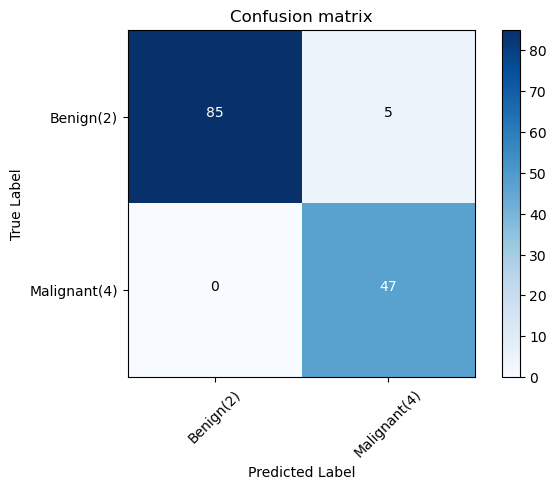

In [26]:
#Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [29]:
#Get F1-score
from sklearn.metrics import f1_score
print('f1 score is:', f1_score(y_test, yhat, average='weighted'))

f1 score is: 0.9639038982104676


In [32]:
#Get jaccard index for accuracy
from sklearn.metrics import jaccard_score
print('jaccard score is:', jaccard_score(y_test, yhat,pos_label=2))

jaccard score is: 0.9444444444444444


## **Resources**
UCI Machine Learning Repository (Asuncion and Newman, 2007) http://mlearn.ics.uci.edu/MLRepository.html

*This notebook was created for practice/notetaking for the IBM Data Science Certificate through Coursera and the lab assignment was created/edited by Saeed Aghabozorgi, Joseph Santarcangelo, Lavanya and Lakshmi.*